In [2]:
import cv2
import os
import numpy as np
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

# LDA Start

# Data preprocessing

In [4]:
label_encode_dict = {}
label_decode_dict = {}

for i in range(1, 41):
    label_encode_dict[i] = f"S{i}"
    
for i in range(1, 41):
    label_decode_dict[f"s{i}"] = i

In [5]:
import os
def load_images_from_folder(folder, label , width, height):
    images = []
    labels = []
    for filename in os.listdir(folder):

        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (width, height))

            if img is not None:
                images.append(img.reshape(1,-1))
                labels.append(label_decode_dict[label])
    return images, labels


In [6]:
train_folder = './data/faces/'
# test_folder = './data/faces/testing'


# Training 데이터 불러오기
train_images = []
train_label = []

print()
for folder in sorted(os.listdir(train_folder)):
    path = os.path.join(train_folder, folder)
    if os.path.isdir(path):
        images, labels = load_images_from_folder(path, folder, 64, 64)
        train_images.append(np.concatenate(images))
        train_label.append(labels)


# 넘파이 배열로 변환
train_data = np.concatenate(train_images)
train_label = np.array(train_label).reshape(-1)
#

print("Training 데이터 shape:", train_data.shape)
print("Training 정답 shape:", train_label.shape)

# print("Testing 데이터 shape:", test_data.shape)



Training 데이터 shape: (400, 4096)
Training 정답 shape: (400,)


In [163]:
from sklearn.model_selection import train_test_split

x_train ,x_test,  y_train, y_test = train_test_split(train_data, train_label , test_size=0.05,random_state=42, shuffle=True)

(20, 4096)


# LDA 시작

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(x_train, y_train)
result = lda.transform(train_data)

In [155]:
result

array([[ -4.70769945,   3.48939744],
       [ -5.25229554,   1.51144589],
       [ -7.11387904,   0.03137577],
       [ -8.04199761,   1.55584469],
       [ -3.66909437,   2.6345119 ],
       [ -5.60239598,   7.97181647],
       [ -7.7721285 ,   1.55672073],
       [ -6.28920061,  -0.30536857],
       [ -6.83621801,   1.53937171],
       [ -6.38626823,  -2.20239423],
       [ -0.49822668,   6.22731625],
       [ -0.89999575,   6.31494098],
       [ -0.51718935,   4.26672461],
       [ -1.87648087,   6.38613845],
       [ -1.21232063,   4.48448668],
       [ -0.563653  ,   3.3493537 ],
       [ -0.11825569,   5.59020068],
       [ -0.67144316,   5.37410136],
       [ -1.22909719,   5.45739124],
       [ -3.09565943,   4.92626521],
       [  1.57574354,  -4.2431498 ],
       [  1.97775467,  -4.1957069 ],
       [  0.93636002,  -6.04898517],
       [  0.85819728,  -5.22982635],
       [  2.08224779,  -4.52802965],
       [  2.80988556,  -3.80893557],
       [  1.52765614,  -4.57804439],
 

In [51]:
from preprocessing import LDA

In [180]:
l = LDA(np.log1p(x_train), y_train)

In [181]:
l.fit(2)

In [182]:
result = l()

In [183]:
result

array([[-45.68546448,  40.64643529],
       [-66.23931022,  50.59617609],
       [-54.04544086,  43.26677652],
       [-43.93210099,  39.10516368],
       [-49.5829479 ,  37.81570819],
       [-72.04711246,  56.49032943],
       [-54.04544086,  43.26677652],
       [-44.85582388,  36.26696591],
       [-53.55601172,  43.81322385],
       [-55.81526365,  42.73058032],
       [-44.85582388,  36.26696591],
       [-52.09094197,  49.98368287],
       [-39.72198928,  27.59953277],
       [-52.09094197,  49.98368287],
       [-39.72198928,  27.59953277],
       [-43.93210099,  39.10516368],
       [-50.54432415,  37.40348038],
       [-67.55528491,  50.07694673],
       [-45.97205307,  43.57072107],
       [-67.55528491,  50.07694673],
       [-49.5829479 ,  37.81570819],
       [-52.19093294,  40.17299668],
       [-54.04544086,  43.26677652],
       [-55.81526365,  42.73058032],
       [-50.88721893,  41.89662396],
       [-30.3376983 ,  27.90594304],
       [-53.55601172,  43.81322385],
 

In [184]:
# 사용할 마커 모양 리스트
marker_shapes = ['o', 's', '^', 'd', '*', 'x', '+', '|', '_']

# 마커 색상 리스트 (예시)
marker_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']


markers = []  # 마커 리스트 초기화

# 40개의 마커 생성
for color in marker_colors:
    for shape in marker_shapes:
        markers.append(shape)

In [185]:
l.classes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [186]:
result[y_train==10].shape


(8, 2)

In [187]:
result


array([[-45.68546448,  40.64643529],
       [-66.23931022,  50.59617609],
       [-54.04544086,  43.26677652],
       [-43.93210099,  39.10516368],
       [-49.5829479 ,  37.81570819],
       [-72.04711246,  56.49032943],
       [-54.04544086,  43.26677652],
       [-44.85582388,  36.26696591],
       [-53.55601172,  43.81322385],
       [-55.81526365,  42.73058032],
       [-44.85582388,  36.26696591],
       [-52.09094197,  49.98368287],
       [-39.72198928,  27.59953277],
       [-52.09094197,  49.98368287],
       [-39.72198928,  27.59953277],
       [-43.93210099,  39.10516368],
       [-50.54432415,  37.40348038],
       [-67.55528491,  50.07694673],
       [-45.97205307,  43.57072107],
       [-67.55528491,  50.07694673],
       [-49.5829479 ,  37.81570819],
       [-52.19093294,  40.17299668],
       [-54.04544086,  43.26677652],
       [-55.81526365,  42.73058032],
       [-50.88721893,  41.89662396],
       [-30.3376983 ,  27.90594304],
       [-53.55601172,  43.81322385],
 

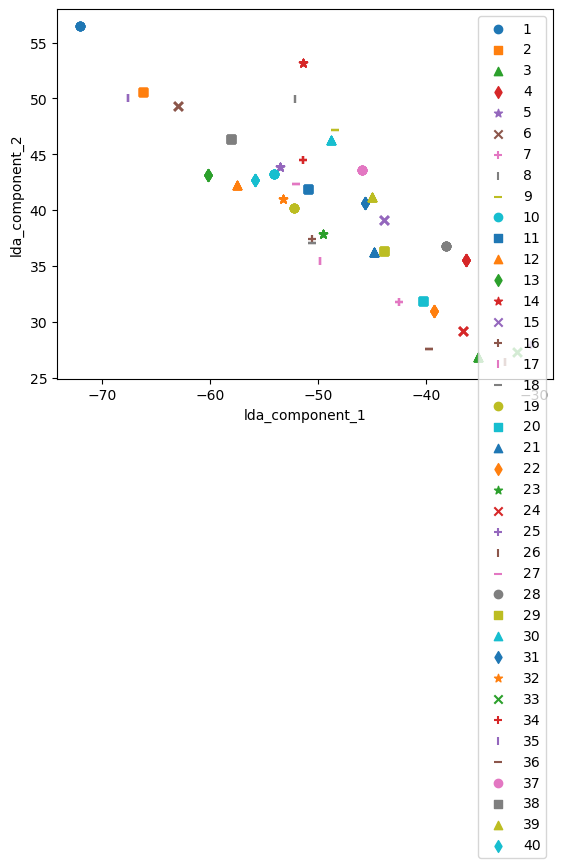

In [188]:
from matplotlib import pyplot as plt

for i, marker in enumerate(markers[:40]):
    x_axis_data = result[y_train==i+1, 0]

    y_axis_data = result[y_train==i+1, 1]

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=f"{i+1}")

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# PCA 샐행

# Eigenface

In [164]:
def face_show(eigenfaces):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(eigenfaces[i], cmap='gray')
        plt.title("Eigenface {}".format(i + 1))
        plt.axis('off')
    plt.show()


In [165]:
from preprocessing import PCA

In [166]:
a = PCA(x_train)

In [167]:
a.fit(10)

(4096, 4096)


In [168]:
result = a()

In [169]:
eigenfaces = a.v.T.reshape(10, 64,64)

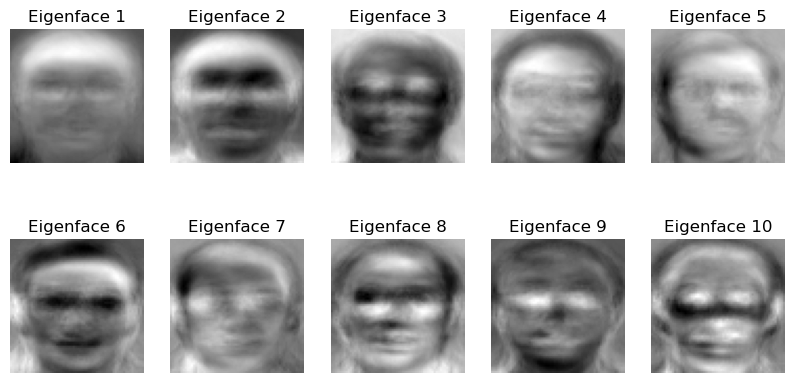

In [170]:
face_show(eigenfaces)

In [171]:
from sklearn.decomposition import PCA as pca3
pcaa = pca3(n_components=10)

In [172]:
pcaa.fit(x_train)

PCA(n_components=10)

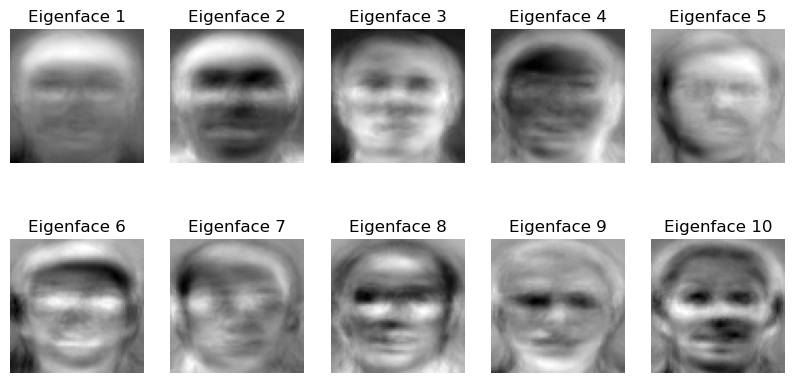

In [173]:
face2 = pcaa.components_.reshape((10, 64, 64))
face_show(face2)

# Test data Reconstruction

In [174]:
a = PCA(x_test)

In [175]:
a.fit(10)

(4096, 4096)


In [176]:
re = a.reconstruct()

In [177]:
re.shape

(20, 4096)

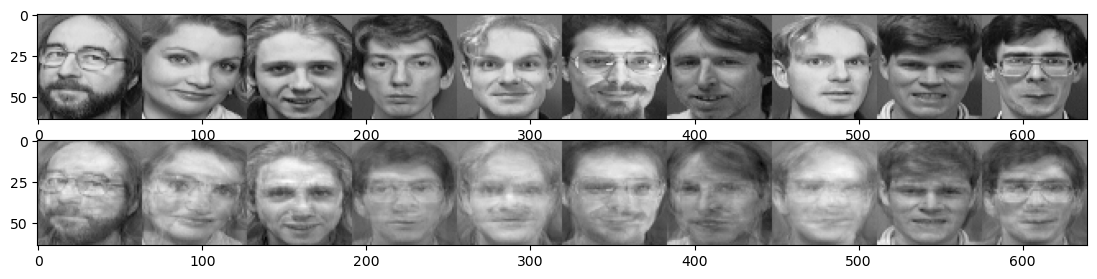

In [178]:
num_images_to_show = 10

origin_image = np.reshape(x_test[:num_images_to_show], (-1, 64, 64))
reconst_image = np.reshape(re[:num_images_to_show], (-1, 64, 64))
fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 3, 3))

ax[0].imshow(np.concatenate(origin_image, -1), cmap="gray")
ax[1].imshow(np.concatenate(reconst_image, -1), cmap="gray")


In [179]:
a = PCA(x_test)
a.fit(3)

(4096, 4096)


In [181]:
result = a()

In [182]:
y_test

array([28, 35, 12, 29, 18, 17, 39, 18, 33, 20,  1,  6, 14, 16, 21, 13, 34,
        7, 30,  8])

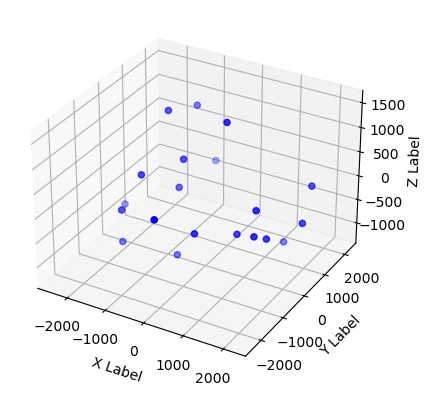

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# (100, 3) 형태의 임의의 데이터 생성
np.random.seed(0)
data =result

# 각 열을 x, y, z 좌표로 사용하여 3차원 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o')  # x, y, z에 대한 산점도를 파란색 동그라미로 그림

# 축 레이블 설정
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 그래프 출력
plt.show()
